# 3.Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations

**Import Necessary modules**

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

**Load grayscale image (512x512)**

In [28]:
image = cv2.imread('ckt_board_saltpep.tif', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))

**Add Salt & Pepper Noise**

In [29]:
noisy_image = random_noise(image, mode='s&p', amount=0.05)  # 5% noise
noisy_image = (noisy_image * 255).astype(np.uint8)  # Convert back to uint8

# (a) Apply average and median spatial filters with 5x5 mask and observe their performance for noise suppression in term of PSNR  

**Apply 5x5 Average Filter**

In [30]:
average_filter = cv2.blur(noisy_image, (5, 5))

**Apply 5x5 Median Filter**

In [31]:
median_filter = cv2.medianBlur(noisy_image, 5)

**Compute PSNR**

In [32]:
psnr_noisy = psnr(image, noisy_image)
psnr_avg = psnr(image, average_filter)
psnr_median = psnr(image, median_filter)

**Display Results**

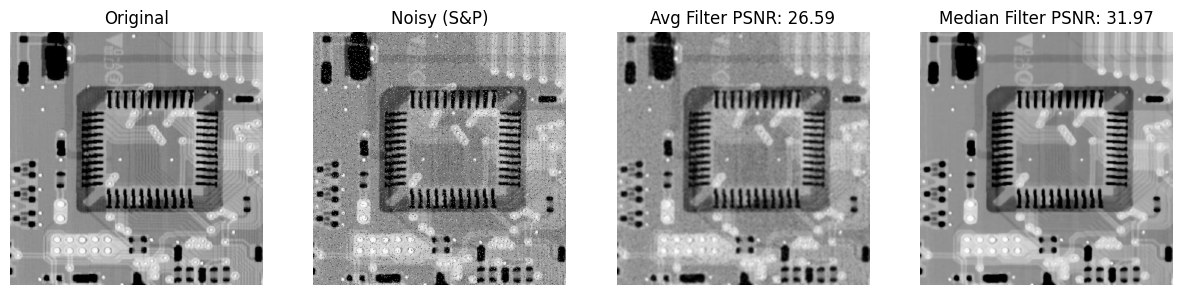

PSNR (Noisy Image): 18.35
PSNR (Average Filtered): 26.59
PSNR (Median Filtered): 31.97


In [33]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
titles = ["Original", "Noisy (S&P)", f"Avg Filter PSNR: {psnr_avg:.2f}", f"Median Filter PSNR: {psnr_median:.2f}"]
images = [image, noisy_image, average_filter, median_filter]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis("off")

plt.show()

# Print PSNR Values
print(f"PSNR (Noisy Image): {psnr_noisy:.2f}")
print(f"PSNR (Average Filtered): {psnr_avg:.2f}")
print(f"PSNR (Median Filtered): {psnr_median:.2f}")

# (b)Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR


**Apply Average Filters with different mask sizes**

In [34]:
avg_3x3 = cv2.blur(noisy_image, (3, 3))
avg_5x5 = cv2.blur(noisy_image, (5, 5))
avg_7x7 = cv2.blur(noisy_image, (7, 7))

**Compute PSNR**

In [35]:
psnr_noisy = psnr(image, noisy_image)
psnr_avg_3x3 = psnr(image, avg_3x3)
psnr_avg_5x5 = psnr(image, avg_5x5)
psnr_avg_7x7 = psnr(image, avg_7x7)

**Display Results**

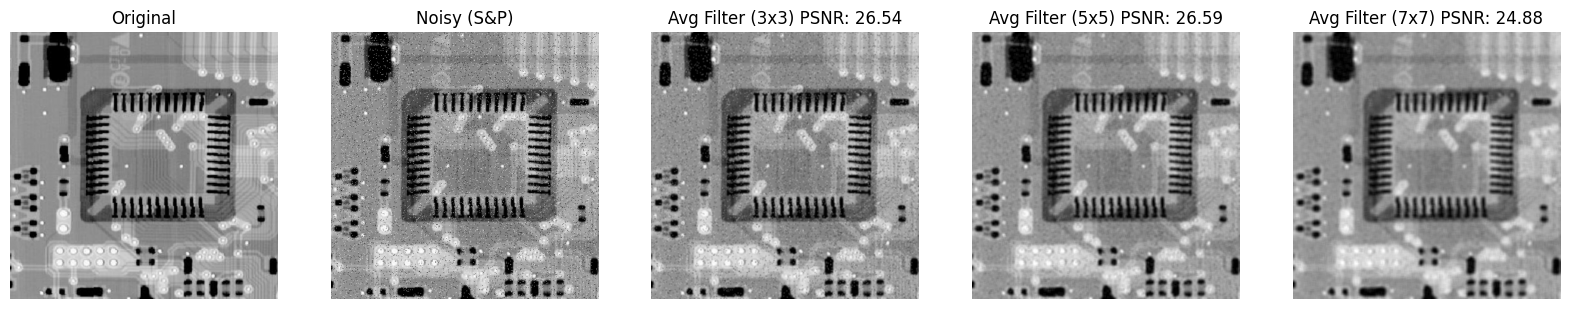

PSNR (Noisy Image): 18.35
PSNR (Avg Filter 3x3): 26.54
PSNR (Avg Filter 5x5): 26.59
PSNR (Avg Filter 7x7): 24.88


In [39]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
titles = [
    "Original",
    "Noisy (S&P)",
    f"Avg Filter (3x3) PSNR: {psnr_avg_3x3:.2f}",
    f"Avg Filter (5x5) PSNR: {psnr_avg_5x5:.2f}",
    f"Avg Filter (7x7) PSNR: {psnr_avg_7x7:.2f}"
]
images = [image, noisy_image, avg_3x3, avg_5x5, avg_7x7]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis("off")

plt.show()

# Print PSNR Values

print(f"PSNR (Noisy Image): {psnr_noisy:.2f}")
print(f"PSNR (Avg Filter 3x3): {psnr_avg_3x3:.2f}")
print(f"PSNR (Avg Filter 5x5): {psnr_avg_5x5:.2f}")
print(f"PSNR (Avg Filter 7x7): {psnr_avg_7x7:.2f}")

# (c) Apply harmonic and geometric mean filter on the noisy image and compare their performance with PSNR


<ipython-input-51-dba812e50ef5>:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_harmonic = psnr(image, harmonic_filtered)
<ipython-input-51-dba812e50ef5>:35: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_geometric = psnr(image, geometric_filtered)


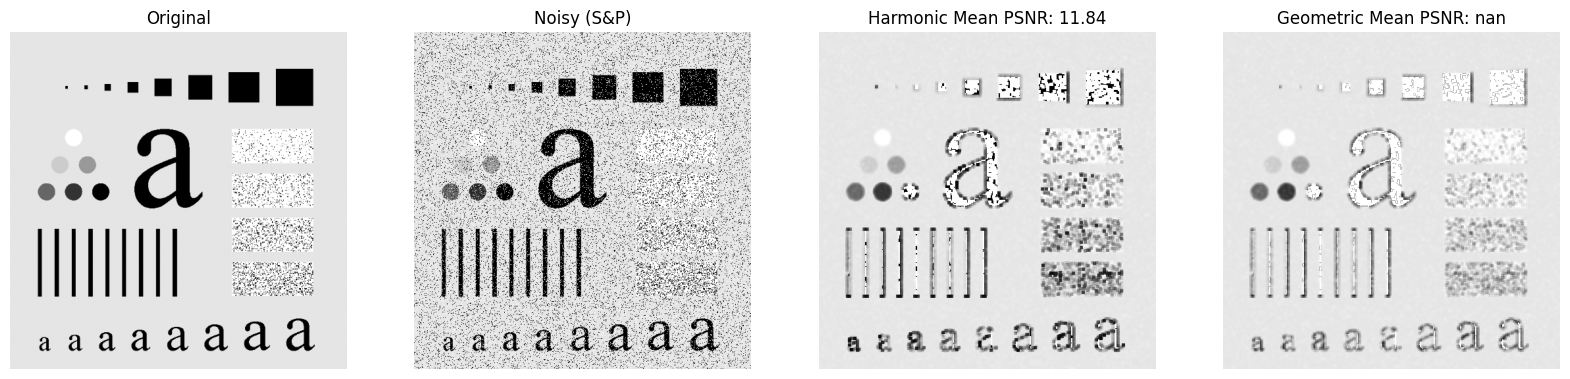

PSNR (Noisy Image): 12.05
PSNR (Harmonic Mean Filter): 11.84
PSNR (Geometric Mean Filter): nan


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.ndimage import generic_filter

# Load grayscale image (512x512)
image = cv2.imread('character.tif', cv2.IMREAD_GRAYSCALE)  # Replace with your image path
image = cv2.resize(image, (512, 512))  # Ensure correct size

# Add Salt & Pepper Noise (Impulse Noise)
noisy_image = random_noise(image, mode='s&p', amount=0.15)  # 5% noise
noisy_image = (noisy_image * 255).astype(np.uint8)  # Convert back to uint8

# Harmonic Mean Filter Function
def harmonic_mean_filter(window):
    window = window[window > 0]  # Avoid division by zero
    return len(window) / np.sum(1.0 / window) if np.sum(1.0 / window) > 0 else 0

# Geometric Mean Filter Function
def geometric_mean_filter(window):
    window = window[window > 0]  # Avoid zero values
    return np.exp(np.mean(np.log(window))) if np.all(window > 0) else 0

# Apply 5x5 Harmonic Mean Filter
harmonic_filtered = generic_filter(noisy_image.astype(np.float64), harmonic_mean_filter, size=5)

# Apply 5x5 Geometric Mean Filter
geometric_filtered = generic_filter(noisy_image.astype(np.float64), geometric_mean_filter, size=5)

# Compute PSNR
psnr_noisy = psnr(image, noisy_image)
psnr_harmonic = psnr(image, harmonic_filtered)
psnr_geometric = psnr(image, geometric_filtered)

# Display Results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
titles = [
    "Original",
    "Noisy (S&P)",
    f"Harmonic Mean PSNR: {psnr_harmonic:.2f}",
    f"Geometric Mean PSNR: {psnr_geometric:.2f}"
]
images = [image, noisy_image, harmonic_filtered, geometric_filtered]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis("off")

plt.show()

# Print PSNR Values
print(f"PSNR (Noisy Image): {psnr_noisy:.2f}")
print(f"PSNR (Harmonic Mean Filter): {psnr_harmonic:.2f}")
print(f"PSNR (Geometric Mean Filter): {psnr_geometric:.2f}")
